# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import random


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from api_keys import wm_key

from IPython.display import Image


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# # Build query URL, GET Request and save the API's response 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + wm_key 

#list of city data
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 100 for logging purposes
    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | acapulco
Processing Record 3 of Set 1 | sorvag
City not found. Skipping...
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | kenai
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | krasnorechenskiy
Processing Record 13 of Set 1 | nome
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | kem
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | methoni
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of 

Processing Record 82 of Set 2 | tsabong
Processing Record 83 of Set 2 | axim
Processing Record 84 of Set 2 | guerrero negro
Processing Record 85 of Set 2 | kathu
Processing Record 86 of Set 2 | cervo
Processing Record 87 of Set 2 | torbay
Processing Record 88 of Set 2 | fort nelson
Processing Record 89 of Set 2 | sidhi
Processing Record 90 of Set 2 | peniche
Processing Record 91 of Set 2 | togur
Processing Record 92 of Set 2 | lucapa
Processing Record 93 of Set 2 | arenapolis
Processing Record 94 of Set 2 | kaka
Processing Record 95 of Set 2 | kodiak
Processing Record 96 of Set 2 | berlevag
Processing Record 97 of Set 2 | jonkoping
Processing Record 98 of Set 2 | alofi
Processing Record 99 of Set 2 | wadi maliz
Processing Record 0 of Set 3 | taltal
Processing Record 1 of Set 3 | longyearbyen
Processing Record 2 of Set 3 | hazebrouck
Processing Record 3 of Set 3 | colares
Processing Record 4 of Set 3 | tongchuan
Processing Record 5 of Set 3 | nuqui
Processing Record 6 of Set 3 | san pol

Processing Record 72 of Set 4 | kebemer
City not found. Skipping...
Processing Record 73 of Set 4 | yar-sale
Processing Record 74 of Set 4 | panjab
Processing Record 75 of Set 4 | high level
Processing Record 76 of Set 4 | gangotri
City not found. Skipping...
Processing Record 77 of Set 4 | portland
Processing Record 78 of Set 4 | ler
Processing Record 79 of Set 4 | arlit
Processing Record 80 of Set 4 | moose factory
Processing Record 81 of Set 4 | abeokuta
Processing Record 82 of Set 4 | viligili
City not found. Skipping...
Processing Record 83 of Set 4 | hanna
Processing Record 84 of Set 4 | cazones
Processing Record 85 of Set 4 | mecca
Processing Record 86 of Set 4 | monte cristi
City not found. Skipping...
Processing Record 87 of Set 4 | santa maria do suacui
Processing Record 88 of Set 4 | beloha
Processing Record 89 of Set 4 | flinders
Processing Record 90 of Set 4 | minsk
Processing Record 91 of Set 4 | komsomolskiy
Processing Record 92 of Set 4 | egvekinot
Processing Record 93 

Processing Record 61 of Set 6 | salmon arm
Processing Record 62 of Set 6 | hwange
Processing Record 63 of Set 6 | tulu bolo
Processing Record 64 of Set 6 | faya
Processing Record 65 of Set 6 | elliot lake
Processing Record 66 of Set 6 | kaeo
Processing Record 67 of Set 6 | jacareacanga
Processing Record 68 of Set 6 | bosaso
Processing Record 69 of Set 6 | guymon
Processing Record 70 of Set 6 | dujuma
City not found. Skipping...
Processing Record 71 of Set 6 | armacao dos buzios
City not found. Skipping...
Processing Record 72 of Set 6 | shcholkine
City not found. Skipping...
Processing Record 73 of Set 6 | shache
Processing Record 74 of Set 6 | pontal do parana
Processing Record 75 of Set 6 | rungata
City not found. Skipping...
Processing Record 76 of Set 6 | great bend
Processing Record 77 of Set 6 | gulariya
Processing Record 78 of Set 6 | grosseto
Processing Record 79 of Set 6 | pachmarhi
Processing Record 80 of Set 6 | tawnat
City not found. Skipping...
Processing Record 81 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [30]:
# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,12,ZA,1555350413,86,-34.42,19.24,59.00,2.73
1,egvekinot,0,RU,1555350382,53,66.32,-179.17,-0.69,2.17
2,umea,0,SE,1555348800,42,63.83,20.26,46.40,3.36
3,makakilo city,1,US,1555350461,64,21.35,-158.09,73.40,3.36
4,cape town,0,ZA,1555350413,72,-33.93,18.42,60.01,10.29


In [31]:
#export .csv
city_data_df.to_csv("city_data.csv", index=False, header=True)

In [32]:
#record count
city_data_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

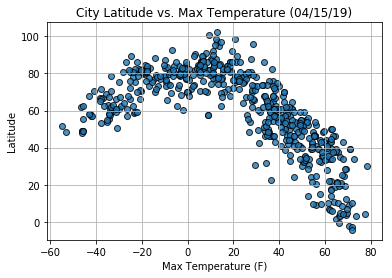

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid()

#save image
plt.savefig("CityTemp.png", transparent=True)
plt.show()

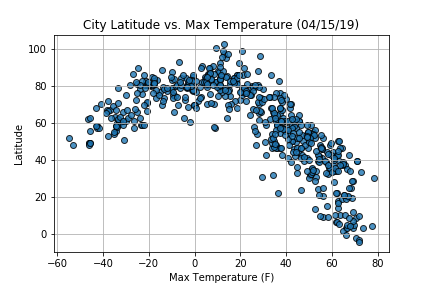

In [39]:
#see exported image (ensure it exported properly)
Image(filename='CityTemp.png') 

#### Latitude vs. Humidity Plot

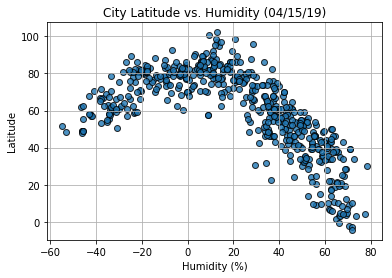

In [40]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats, max_temps, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()

#save image
plt.savefig("CityHumidity.png", transparent=True)
plt.show()

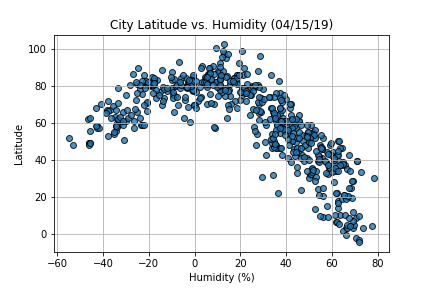

In [41]:
#see exported image (ensure it exported properly)
Image(filename='CityHumidity.png') 

#### Latitude vs. Cloudiness Plot

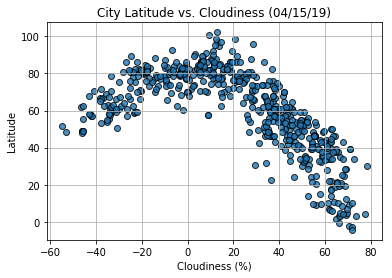

In [42]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats, max_temps, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()

#save image
plt.savefig("CityCloud.png", transparent=True)
plt.show()


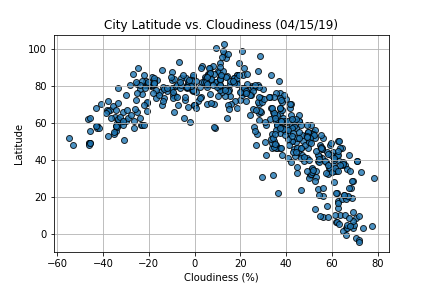

In [43]:
#see exported image (ensure it exported properly)
Image(filename='CityCloud.png') 

#### Latitude vs. Wind Speed Plot

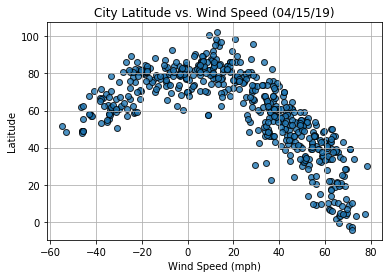

In [44]:
# Build scatter plot for latitude vs. Wind
plt.scatter(lats, max_temps, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()

#save image
plt.savefig("CityWind.png", transparent=True)
plt.show()

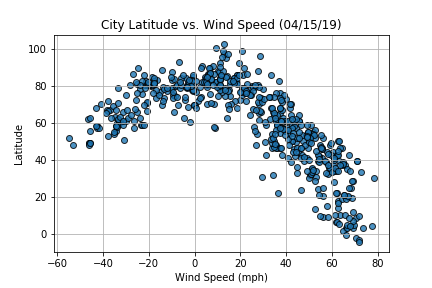

In [45]:
#see exported image (ensure it exported properly)
Image(filename='CityWind.png') 